In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Extracción de datos y creación de dataframes 

In [2]:
data_coursera_reseñas = pd.read_csv('Coursera_reviews.csv')
data_coursera_cursos = pd.read_csv('Coursera_courses.csv')
data_edx = pd.read_csv('edx_courses.csv')


                                            COURSERA_CURSOS

In [3]:
data_coursera_cursos.head() ##visualizamos

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
data_coursera_cursos.shape ##vemos el tamaño del archivo

(623, 4)

In [5]:
data_coursera_cursos.isna().sum() ##chequeamos que no hayan valores nulos

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [6]:
data_coursera_cursos[data_coursera_cursos.duplicated()] # Verificamos existenvia de filas duplicadas por columnas 

,name,institution,course_url,course_id


                                             COURSERA RESEÑAS

In [7]:
data_coursera_reseñas.head() ##visualizamos

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [8]:
data_coursera_reseñas.shape #chequeamos el tamaño del archivo

(1454711, 5)

In [9]:
data_coursera_reseñas.rating.max()

5

In [10]:
data_coursera_reseñas[data_coursera_reseñas.duplicated()] ## vemos si existen valores duplicados

,reviews,reviewers,date_reviews,rating,course_id
31,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
32,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
33,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
34,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training
35,"Great course, lectures were straight forward a...",By Samuel D,"Jan 24, 2020",5,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


En el dataset de reseñas de coursera se encuentran valores repetidos y mucho mas del 50%, eliminaremos estos datos duplicados.

In [11]:
data_coursera_reseñas.drop_duplicates(inplace=True) ##dropeamos los duplicados

In [12]:
data_coursera_reseñas[data_coursera_reseñas.duplicated()] ##verificamos 

,reviews,reviewers,date_reviews,rating,course_id


In [13]:
data_coursera_reseñas.shape ##vemos de que tamaño nos quedo el dataframe

(519947, 5)

In [14]:
data_coursera_reseñas.isna().sum() ##chequeo si hay valores nulos en la data

reviews         56
reviewers        0
date_reviews     0
rating           0
course_id        0
dtype: int64

In [15]:
##normalizamos la columna date_reviews al formato %Y-%m-%d

data_coursera_reseñas['date_reviews'] = pd.to_datetime(data_coursera_reseñas['date_reviews'])

In [16]:
data_coursera_reseñas.head()##visualizamos

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training


In [17]:
data_coursera_reseñas.fillna(value='Sin dato', inplace=True)

In [18]:
data_coursera_reseñas.head(50)

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,2020-02-12,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,2020-09-28,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,2020-04-08,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,2020-02-24,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,2020-06-18,4,google-cbrs-cpi-training
5,Some of the quizzes contained material not exp...,By Daniel F,2019-12-23,4,google-cbrs-cpi-training
6,Solid presentation all the way through. I real...,By Logan D,2020-09-03,5,google-cbrs-cpi-training
7,Probably the best certification course I've ta...,By Luis M C,2019-11-21,5,google-cbrs-cpi-training
8,The ProctorU.com system took 2 times the amoun...,By scott w,2020-09-28,5,google-cbrs-cpi-training
9,Covered all of the required information in an ...,By Ryan H,2019-08-26,5,google-cbrs-cpi-training


In [19]:
data_coursera_reseñas.isna().sum() #verificamos que no hayan nulos

reviews         0
reviewers       0
date_reviews    0
rating          0
course_id       0
dtype: int64

In [20]:
data_coursera_reseñas['rating'].min() ##vemos el valor minimo del rating

1

In [21]:
data_coursera_reseñas['rating'].max() ##vemos el valor maximo del rating

5

                                                    EDX COURSES

In [22]:
data_edx.head() #vemos la data

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [23]:
data_edx.shape ##vemos el tamaño de la data de edx

(975, 16)

In [24]:
data_edx.duplicated().sum() ##chequeamos si hay valores duplicados

1

In [25]:
data_edx.drop_duplicates(inplace=True) #hay un solo elemento duplicado, lo eliminamos ya que no afectará al modelo

In [26]:
data_edx[data_edx.duplicated()]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url


In [27]:
data_edx.isna().sum() #visualizamos cuantos valores nulos hay por columna

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       557
course_url              0
dtype: int64

In [28]:
data_edx.loc[data_edx['instructors'].isna() == True ]

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
390,Analytics in Python,Learn the fundamental of programming in Python...,"82,210",Instructor-led on a course schedule,Columbia University,NaN,Intermediate,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,Data is the lifeblood of an organization. Comp...,NaN,https://www.edx.org/course/analytics-in-python
401,Just Reading and Writing in English | 生活英语读写,Learn how to read and write in English in the ...,"33,303",Self-paced on your time,Tsinghua University,NaN,Introductory,Art & Culture,English,English,2–4 hours per week,15 Weeks,FREE-Add a Verified Certificate for $149 USD,Reading enriches our life and writing enables ...,Week 1 - Learning\nIntroduction to the problem...,https://www.edx.org/course/just-reading-and-wr...
516,"Data, Models and Decisions in Business Analytics",Learn fundamental tools and techniques for usi...,"36,289",Instructor-led on a course schedule,Columbia University,NaN,Advanced,Business & Management,English,NaN,8–10 hours per week,12 Weeks,FREE-Add a Verified Certificate for $249 USD,"In today’s world, managerial decisions are inc...",NaN,https://www.edx.org/course/data-models-and-dec...


In [29]:
##dropeamos la columna course_syllabus ya que hay mas de la mitad de valores vacios
data_edx.drop(columns={'course_syllabus'}, inplace=True)

In [30]:
data_edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_url              0
dtype: int64

In [31]:
data_edx['subtitles'].fillna(value='Sin dato', inplace=True) #Normalizamos la columna subtitles

In [32]:
data_edx['instructors'].fillna(value='Sin dato', inplace=True) #Nomalizamos la columna instructors

In [33]:
data_edx.rename(columns={'Level':'level'}, inplace=True) #Normalizamos la columna level

In [34]:
data_edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             0
level                   0
subject                 0
language                0
subtitles               0
course_effort           0
course_length           0
price                   0
course_description     40
course_url              0
dtype: int64

In [35]:
"""Crearé esta función para dejar solo los caracteres numericos en la columna price"""
def dejar_solo_cifras(txt):
  return "".join(c for c in txt if c.isdigit())

In [36]:
data_edx.price = data_edx.price.map(dejar_solo_cifras).astype(int) ##usamos la funcion creada y cambiamos el tipo de valores de la columna a int

In [37]:
data_edx.price.min() #vemos el valor minimo en la columna price 

5

In [38]:
data_edx.price.max() #chequeamos el valor maximo en la columna price y nos da 39960 tiene pinta de Outlier asi que utilizare
                        #la tecnica del rango intercuartilico

39960

In [39]:
Q1 = data_edx['price'].quantile(0.25)
Q3 = data_edx['price'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

49.0
149.0
100.0
-101.0
299.0


In [40]:
print('Cantidad de registros totales:', data_edx.shape[0])   #imprimimos cantidad de datos en el dataframe
print('Cantidad de outliers:', data_edx[(data_edx['price']<BI) | (data_edx['price']>BS)].shape[0] ) #imprimimos cantidad de outlier en la columna price

Cantidad de registros totales: 974
Cantidad de outliers: 18


In [41]:
##Eliminare los outlier de mi dataframe
outlier = (data_edx['price']<BI) | (data_edx['price']>BS) 

data_edx = data_edx[~outlier]

In [42]:
data_edx.shape #chequemos el tamaño de nuestro dataframe

(956, 15)

In [43]:
data_edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...


In [44]:
data_edx.iloc[1,1]

'This course is a "no prerequisite" introduction to Python Programming. You will learn about variables, conditional execution, repeated execution and how we use functions. The homework is done in a web browser so you can do all of the programming assignments on a phone or public computer.'

In [45]:
data_edx.isna().sum()

title                   0
summary                53
n_enrolled            117
course_type             0
institution             0
instructors             0
level                   0
subject                 0
language                0
subtitles               0
course_effort           0
course_length           0
price                   0
course_description     40
course_url              0
dtype: int64

In [46]:
data_edx_copy1 = data_edx.copy() #creamos una copia del dataframe para normalizar la columna n_enrolled

In [47]:
#data_edx_copy.n_enrolled.fillna(value=0, inplace=True) #colocamos 0 en los valores nulos de la columna n_enrolled

In [48]:
lista = list(data_edx_copy1['n_enrolled']) #hacemos un filtro por la columna n_enrolled y la transformamos en lista

In [49]:
def quita_coma(num):  #creamos esta función para quitar las comas en cada valor de la lista
    return num.replace(",","")

In [50]:
lista_n =  []  ##recorremos la lista con un bucle for y usamos la funcion quita_coma
for indice, item in enumerate(lista): 
    lista_n = lista_n + [quita_coma(str(item))]

In [51]:
def parsea(item): #creamos esta funcion para parsear los elementos de la lista a int
    return int(item)

In [52]:
'0' in lista_n ##observamos si el 0 esta en la lista

False

In [53]:
#ya que el 0 no esta la lista los colocare donde el valor sea nan

lista_completa = []
for item in lista_n:
    if item == 'nan':
        lista_completa = lista_completa + [0]
    else:
        lista_completa = lista_completa + [item]

In [54]:
lista_parseada = []
for item in lista_completa:
    lista_parseada = lista_parseada + [int(item)]

In [55]:
len(lista_parseada) == data_edx_copy1.shape[0] #comprobamos si tamaño de la lista es igual al dataframe

True

In [56]:
data_edx_copy1.drop(columns='n_enrolled',inplace=True) ## dropeamos la columna n_enrolled

In [57]:
data_edx_copy1['n_enrolled'] = pd.Series(lista_parseada) ##creamos la columna n_enrolled con los valores ya normalizados

In [58]:
data_edx_copy1 #vizualizamos

,title,summary,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url,n_enrolled
0,How to Learn Online,Learn essential strategies for successful onli...,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,49,"Designed for those who are new to elearning, t...",https://www.edx.org/course/how-to-learn-online,124980.0
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,49,This course aims to teach everyone the basics ...,https://www.edx.org/course/programming-for-eve...,293864.0
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,90,"This is CS50x , Harvard University's introduct...",https://www.edx.org/course/cs50s-introduction-...,2442271.0
3,The Analytics Edge,"Through inspiring examples and stories, discov...",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,199,"In the last decade, the amount of data availab...",https://www.edx.org/course/the-analytics-edge,129555.0
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,249,Begin your journey in a new career in marketin...,https://www.edx.org/course/marketing-analytics...,81140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,25,The high rates of crime and violence are two o...,https://www.edx.org/course/leaders-in-citizen-...,NaN
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,139,Are you an original designer? Or a DIY fancier...,https://www.edx.org/course/pattern-studying-an...,NaN
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,139,What happens in your brain when you make a dec...,https://www.edx.org/course/computational-neuro...,NaN
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,25,"According to the United Nations, urbanization ...",https://www.edx.org/course/cities-and-the-chal...,NaN


In [59]:
data_edx_copy1.isna().sum()

title                  0
summary               53
course_type            0
institution            0
instructors            0
level                  0
subject                0
language               0
subtitles              0
course_effort          0
course_length          0
price                  0
course_description    40
course_url             0
n_enrolled            18
dtype: int64

In [60]:
##observamos que aun hay valores nulos en la columna n_enrolled los remplazare con 0 

data_edx_copy1['n_enrolled'].fillna(value=0, inplace=True)

In [61]:
data_edx_copy1.isna().sum() ##vemos que columnmas quedan con valores nulos

title                  0
summary               53
course_type            0
institution            0
instructors            0
level                  0
subject                0
language               0
subtitles              0
course_effort          0
course_length          0
price                  0
course_description    40
course_url             0
n_enrolled             0
dtype: int64

In [62]:
data_edx_copy1['summary'].fillna(value='Sin dato', inplace=True) #normalizamos la columna summary

In [63]:
data_edx_copy1['course_description'].fillna(value='Sin dato', inplace=True) #normalizamos columna course_description

In [64]:
data_edx_copy1.isna().sum()

title                 0
summary               0
course_type           0
institution           0
instructors           0
level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_url            0
n_enrolled            0
dtype: int64

In [65]:
data_edx_copy1.language.value_counts() ## observamos que en esta columna hay un dato que esta invertido 1 es el language y اللغة العربية es el valor

English          762
Español          172
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
اللغة العربية      1
Deutsch            1
Name: language, dtype: int64

In [66]:
edx_copy = data_edx_copy1.copy()

In [67]:
edx_copy['language'] = edx_copy['language'].replace("1","اللغة العربية")

In [68]:
edx_copy.loc[edx_copy['language'] == "اللغة العربية"] ##al parecer todo esta bien, desconozco por qué al usar el value_count este dato se invierte

,title,summary,course_type,institution,instructors,level,subject,language,subtitles,course_effort,course_length,price,course_description,course_url,n_enrolled
672,مساق اللّغة العربيّة,إن مساق اللغة العربية ARBU 140، تم تأليفه لإعد...,Self-paced on your time,United Arab Emirates University,باسلة موسى جلو,Introductory,Language,اللغة العربية,اللغة العربية,3–4 hours per week,8 Weeks,49,Sin dato,https://www.edx.org/course/msq-llg-lrby,138884.0


In [69]:
##hacemos un filtro sobre las columnas de interes para ver como influyen en el producto vendido dropeo las columas que no me interesan
edx_copy.drop(['summary','course_type','institution','instructors','subject','subtitles','course_effort','course_length','course_description','course_url'],axis=1,inplace=True)  

In [70]:
edx_copy.level.value_counts()

Introductory    617
Intermediate    264
Advanced         75
Name: level, dtype: int64

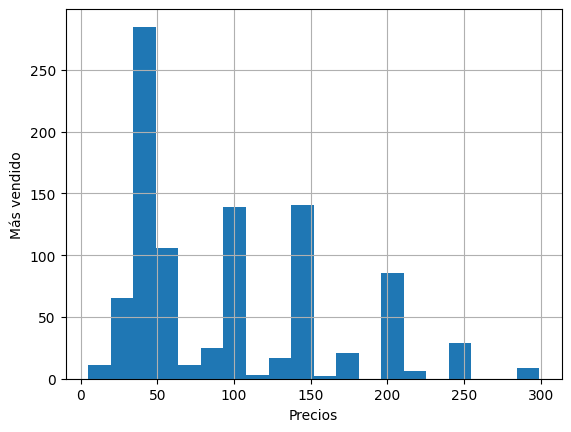

In [71]:
plt.hist(edx_copy.price, bins= 20)  ##ploteamos con respecto al precio para ver cuál es el precio que la gente esta dispuesta a pagar
plt.xlabel('Precios')
plt.ylabel('Más vendido')
plt.grid()
plt.show()

In [72]:
edx_copy['price'].corr(edx_copy['n_enrolled']) ##calculamos la correlación entre el precio y número de estudiantes inscritos 

-0.009482190720812004

El coeficiente de correlación es -0.009482190720812004 .Esta correlación es negativa, nos dice que los puntos y las asistencias están correlacionados negativamente. Esto quiere decir que a medida que aumentan los valores en la columna de precios, los valores en la columna de numero de inscristos tienden a disminuir.

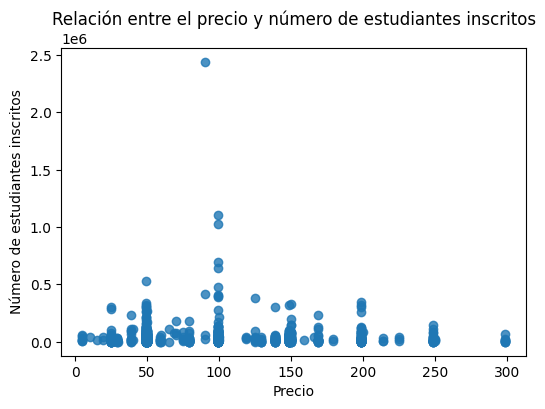

In [73]:
##veamos como se relacionan el precio y la cantidad de personas inscritas graficamente
# Gráfico

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=edx_copy.price, y=edx_copy.n_enrolled, alpha= 0.8)
plt.title('Relación entre el precio y número de estudiantes inscritos')
ax.set_xlabel('Precio')
ax.set_ylabel('Número de estudiantes inscritos');

In [74]:
##eliminamos las columnas que no me interan para generar un csv nuevo y hacer los reportes
data_edx_copy1.drop(['summary','course_type','institution','instructors','subject','course_effort','course_length','course_description','course_url'],axis=1,inplace=True)

In [75]:
data_edx_copy1.head() ##vizualizamos que esten las columnas que me interesan

,title,level,language,subtitles,price,n_enrolled
0,How to Learn Online,Introductory,English,English,49,124980.0
1,Programming for Everybody (Getting Started wit...,Introductory,English,English,49,293864.0
2,CS50's Introduction to Computer Science,Introductory,English,English,90,2442271.0
3,The Analytics Edge,Intermediate,English,English,199,129555.0
4,Marketing Analytics: Marketing Measurement Str...,Introductory,English,English,249,81140.0


In [76]:
#data_edx_copy1.to_csv('edx.csv',index=False) ##generamos el csv

In [77]:
edx_copy.loc[edx_copy.n_enrolled.idxmax()]  ##Observamos los datos del curso con mas estudiantes inscritos

title         CS50's Introduction to Computer Science
level                                    Introductory
language                                      English
price                                              90
n_enrolled                                  2442271.0
Name: 2, dtype: object

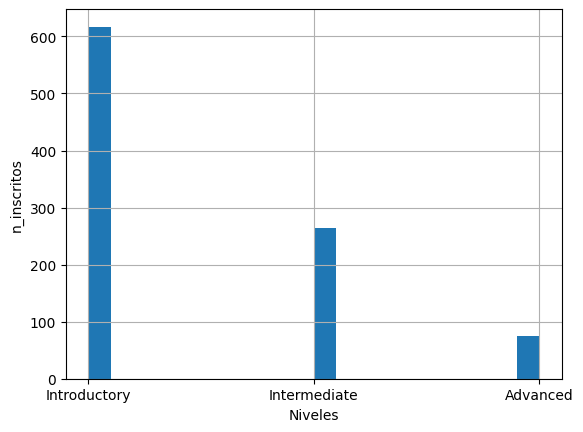

In [78]:
plt.hist(edx_copy.level, bins= 20)  ##ploteamos para ver en nivel del curso que suele ser el mas comprado en esta plataforma
plt.xlabel('Niveles')
plt.ylabel('n_inscritos')
plt.grid()
plt.show()

Viendo este gráfico se podria interpretar que a medida que los cursos aumentan de nivel suelen haber menos estudiantes inscriptos, la razón de esto se debe a que muchos estudiantes no habrán terminado el introductorio, o también que hayan terminado el introductorio y se sientan preparados para continuar aprendiendo de forma independiente.

In [79]:
edx_copy.price.max()

299

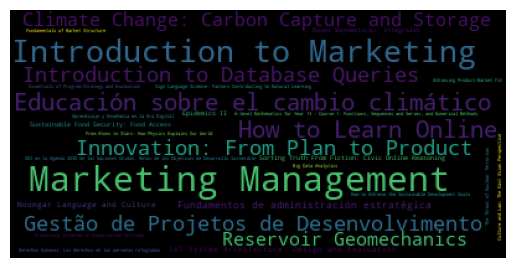

In [106]:
from wordcloud import WordCloud  ##nube de palabras edx
data2 = edx_copy['title'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(data2)

plt.imshow(wc)
plt.axis('off')
plt.show()

                                                        UDEMY COURSES

In [80]:
data_Udemy = pd.read_csv('udemy_courses.csv')

In [81]:
data_Udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [82]:
data_Udemy.shape

(3678, 12)

In [83]:
data_Udemy.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [84]:
data_Udemy.duplicated().sum()

6

In [85]:
data_Udemy[data_Udemy.duplicated()] ##Chequeamos las instancias duplicadas

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


Aunque aparezcan instancias duplicadas no son en esencia los mismos cursos ya que las caracteristicas de cada curso es diferente 
se puede apreciar en el titulo de cada curso, la url, y/o el número de suscriptores

In [86]:
print(data_Udemy[data_Udemy['price'] <0]) ##verificamos que no hayan precios menores que cero

Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject]
Index: []


In [87]:
print(data_Udemy[(data_Udemy['price'] <= 0)  & (data_Udemy['is_paid'] == True)]) #Confirmamos que no hayan inconsistencias en estas columnas

Empty DataFrame
Columns: [course_id, course_title, url, is_paid, price, num_subscribers, num_reviews, num_lectures, level, content_duration, published_timestamp, subject]
Index: []


In [88]:
print(data_Udemy.price.min()) #chequeamos el valor minimo en la columna price

0


In [89]:
print(data_Udemy.price.max()) #chequeamos el valor maximo en la columna price

200


In [90]:
data_Udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [91]:
##Ellos solicitan segmentarlos en nivel de ventas según precio, idioma, nivel y rating de cada curso para 
##analizar qué tanto influyen dichas variables en la demanda del producto vendido.

In [92]:
data_Udemy['level'].value_counts() ##observamos los diferentes tipos de niveles

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

In [93]:
##hacemos un filtro sobre las columnas de interes para ver como influyen en el producto vendido
data_udemy_filtro = data_Udemy.copy() ##hago una copia y dropeo las columas que no me interesan


In [94]:
data_udemy_filtro.drop(['url','is_paid','num_reviews','content_duration','published_timestamp','subject'], axis=1,inplace=True)

In [95]:
data_udemy_filtro

,course_id,course_title,price,num_subscribers,num_lectures,level
0,1070968,Ultimate Investment Banking Course,200,2147,51,All Levels
1,1113822,Complete GST Course & Certification - Grow You...,75,2792,274,All Levels
2,1006314,Financial Modeling for Business Analysts and C...,45,2174,51,Intermediate Level
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,95,2451,36,All Levels
4,1011058,How To Maximize Your Profits Trading Options,200,1276,26,Intermediate Level
...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,100,1040,21,All Levels
3674,1088178,How To Design A WordPress Website With No Codi...,25,306,42,Beginner Level
3675,635248,Learn and Build using Polymer,40,513,48,All Levels
3676,905096,CSS Animations: Create Amazing Effects on Your...,50,300,38,All Levels


In [96]:
data_udemy_filtro.sort_values(['num_subscribers'],ascending=False).head(50)

,course_id,course_title,price,num_subscribers,num_lectures,level
2827,41295,Learn HTML5 Programming From Scratch,0,268923,45,All Levels
3032,59014,Coding for Entrepreneurs Basic,0,161029,27,Beginner Level
3230,625204,The Web Developer Bootcamp,200,121584,342,All Levels
2783,173548,Build Your First Website in 1 Week with HTML5 ...,0,120291,30,Beginner Level
3232,764164,The Complete Web Developer Course 2.0,200,114512,304,All Levels
1896,19421,Free Beginner Electric Guitar Lessons,0,101154,95,Beginner Level
2589,473160,Web Design for Web Developers: Build Beautiful...,0,98867,20,All Levels
2619,94430,Learn Javascript & JQuery From Scratch,30,84897,10,All Levels
3289,130064,Practical PHP: Master the Basics and Code Dyna...,0,83737,45,All Levels
3247,364426,JavaScript: Understanding the Weird Parts,175,79612,85,All Levels


In [97]:
data_udemy_filtro.loc[data_udemy_filtro.num_lectures.idxmax()]  
#Visualizamos el curso que más se ha leido, se podria decir que este es el mejor curso

course_id                                                      79154
course_title       Back to School Web Development and Programming...
price                                                            200
num_subscribers                                                18170
num_lectures                                                     779
level                                                 Beginner Level
Name: 2707, dtype: object

In [98]:
data_udemy_filtro.loc[data_udemy_filtro.num_lectures.idxmin()] 
##Visualizamos el curso que menos se ha leido, el precio es bajo, no tiene suscriptores y tampoco lecturas

course_id                                                     627332
course_title       Mutual Funds for Investors in Retirement Accounts
price                                                             20
num_subscribers                                                    0
num_lectures                                                       0
level                                                     All Levels
Name: 892, dtype: object

In [99]:
data_udemy_filtro.loc[data_udemy_filtro.num_lectures.idxmax()]
##Visualizamos el curso que más se ha leido, se puede apreciar que el precio es de 200$ siendo este el precio tope en la columna price

course_id                                                      79154
course_title       Back to School Web Development and Programming...
price                                                            200
num_subscribers                                                18170
num_lectures                                                     779
level                                                 Beginner Level
Name: 2707, dtype: object

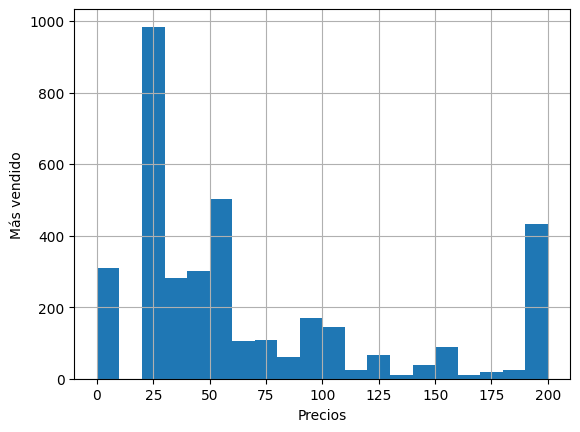

In [100]:
plt.hist(data_udemy_filtro.price, bins= 20)  ##ploteamos con respecto al precio para ver cuál es el precio que la gente esta dispuesta a pagar
plt.xlabel('Precios')
plt.ylabel('Más vendido')
plt.grid()
plt.show()

In [101]:
data_udemy_filtro['price'].corr(data_udemy_filtro['num_lectures']) ##calculamos la correlacion entre el precio y numero de lecturas

0.3301604481628124

El coeficiente de correlación es 0.3301604481628124. Dado que esta correlación es positiva, nos dice que los precios y los números de lecturas están correlacionados positivamente. En otras palabras, a medida que aumentan los valores en la columna de precios, los valores en la columna de número de lecturas tienden a aumentar.

In [102]:
data_udemy_filtro['price'].corr(data_udemy_filtro['num_subscribers'])

0.05076934882586656

El coheficiente de correlación es de 0.05076934882586656. Las columnas price y número de suscriptores se correlacionan positivamente. Mientras que más aumentan los precios aumentan el numero de suscriptores, hablando coloquialmente una parte de la población esta dispuesta a pagar más o suscribirse en un curso de buena calidad, como dice el dicho lo barato sale caro, por esto la gente siempre busca la mejor marca o aquel producto que le ofrezca mucho más de lo que le ofrece otros productos. En nuestro analisis no quiere decir que los cursos que valen aproximadamente 25$ sean malos, no!, ya que hay una buena cantidad de personas que han pagado por estos cursos, sin embargo hay una parte de la población que compran y se suscriben a los cursos de mayor valor porque buscan algo más que solo lo basico, por ejemplo los clientes buscan cursos que no solo le den las clases del curso en vivo o grabadas, también buscan variables donde el curso ofrezca certificación o que sean para aprender las habilidades más demandadas en el mercado actual.

                                         Análisis gráfico udemy

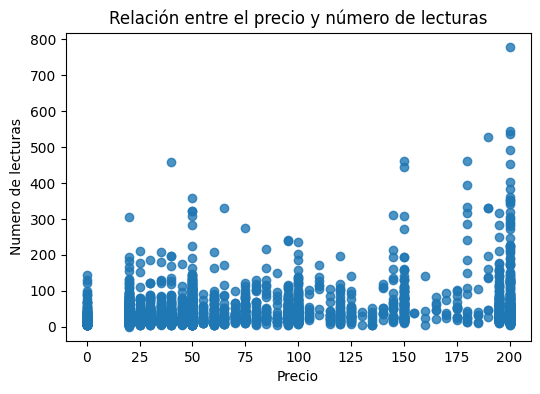

In [103]:
# Gráfico

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=data_udemy_filtro.price, y=data_udemy_filtro.num_lectures, alpha= 0.8)
plt.title('Relación entre el precio y número de lecturas')
ax.set_xlabel('Precio')
ax.set_ylabel('Numero de lecturas');

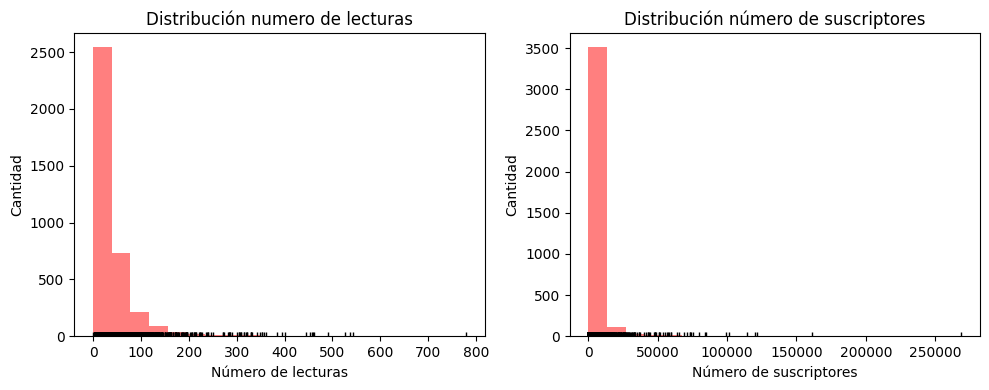

In [104]:
# Gráfico distribución de número de lecturas y número de suscriptores
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=data_udemy_filtro.num_lectures, bins=20, color="red", alpha=0.5)
axs[0].plot(data_udemy_filtro.num_lectures, np.full_like(data_udemy_filtro.num_lectures, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución numero de lecturas')
axs[0].set_xlabel('Número de lecturas')
axs[0].set_ylabel('Cantidad')

axs[1].hist(x=data_udemy_filtro.num_subscribers, bins=20, color="red", alpha=0.5)
axs[1].plot(data_udemy_filtro.num_subscribers, np.full_like(data_udemy_filtro.num_subscribers, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución número de suscriptores')
axs[1].set_xlabel('Número de suscriptores')
axs[1].set_ylabel('Cantidad')


plt.tight_layout();

In [112]:
##generare un csv nuevo con la información filtrada

#data_udemy_filtro.to_csv('Udemy.csv', index=False)

Me quedare con los csv creados udemy y edx, no trabajare con los de coursera porque no tengo información suficiente de estos dos csv 
y ya no me queda tiempo para hacer el dashboar :(

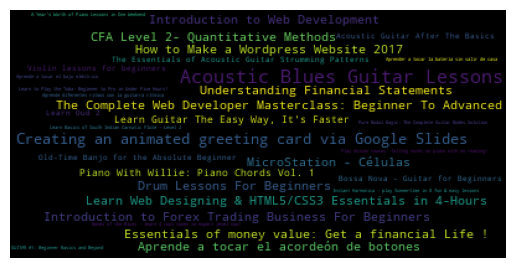

In [105]:
from wordcloud import WordCloud   ##nube de palabras de udemy
data = data_udemy_filtro['course_title'].value_counts().to_dict()
wc = WordCloud().generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [114]:
data_Udemy.loc[data_Udemy.num_subscribers.idxmax()]['num_subscribers']

268923